In [1]:
#This is where we will write up the group presentation

In [1]:
#This is a test of the updating changes for the file.

In [2]:
#test number two

8*5

40

In [3]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn     

In [4]:
pam = pa.read_csv('../police-arrests-made.csv', sep = ';')

In [5]:
#Given the crime commited, can we determine the age and gender of the offender???

C:\Users\Connor\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Connor\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


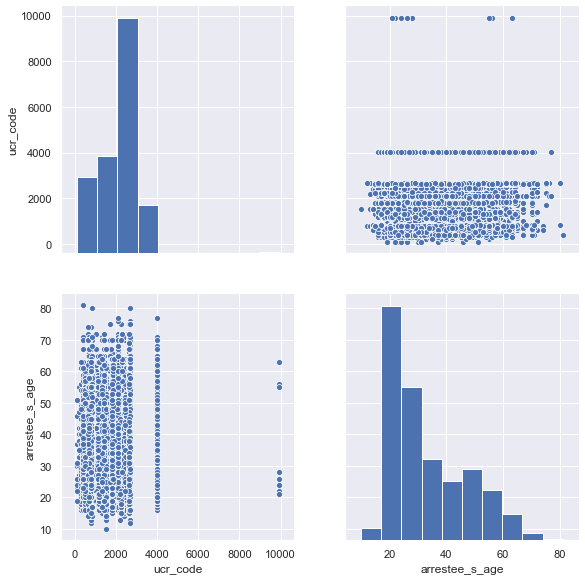

In [6]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(9, 9)  


C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Connor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


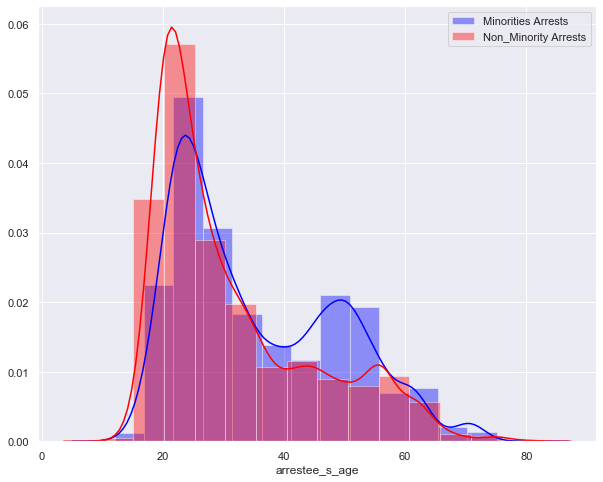

In [7]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='Minorities Arrests', kde=True, bins=14) 
sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='Non_Minority Arrests', kde=True, bins=14)
plt.legend();

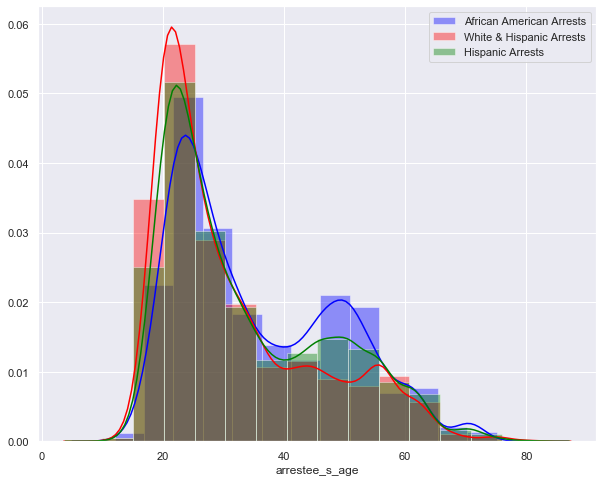

In [8]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='African American Arrests', kde=True, bins=14) 

sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='White & Hispanic Arrests', kde=True, bins=14)

sn.distplot(pam[pam.arrestee_ethnicity!='H'].arrestee_s_age, color='green', 
            label='Hispanic Arrests', kde=True, bins=14)

plt.legend();

In [9]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [10]:
set(pam.arrestee_ethnicity)

{'H', nan}

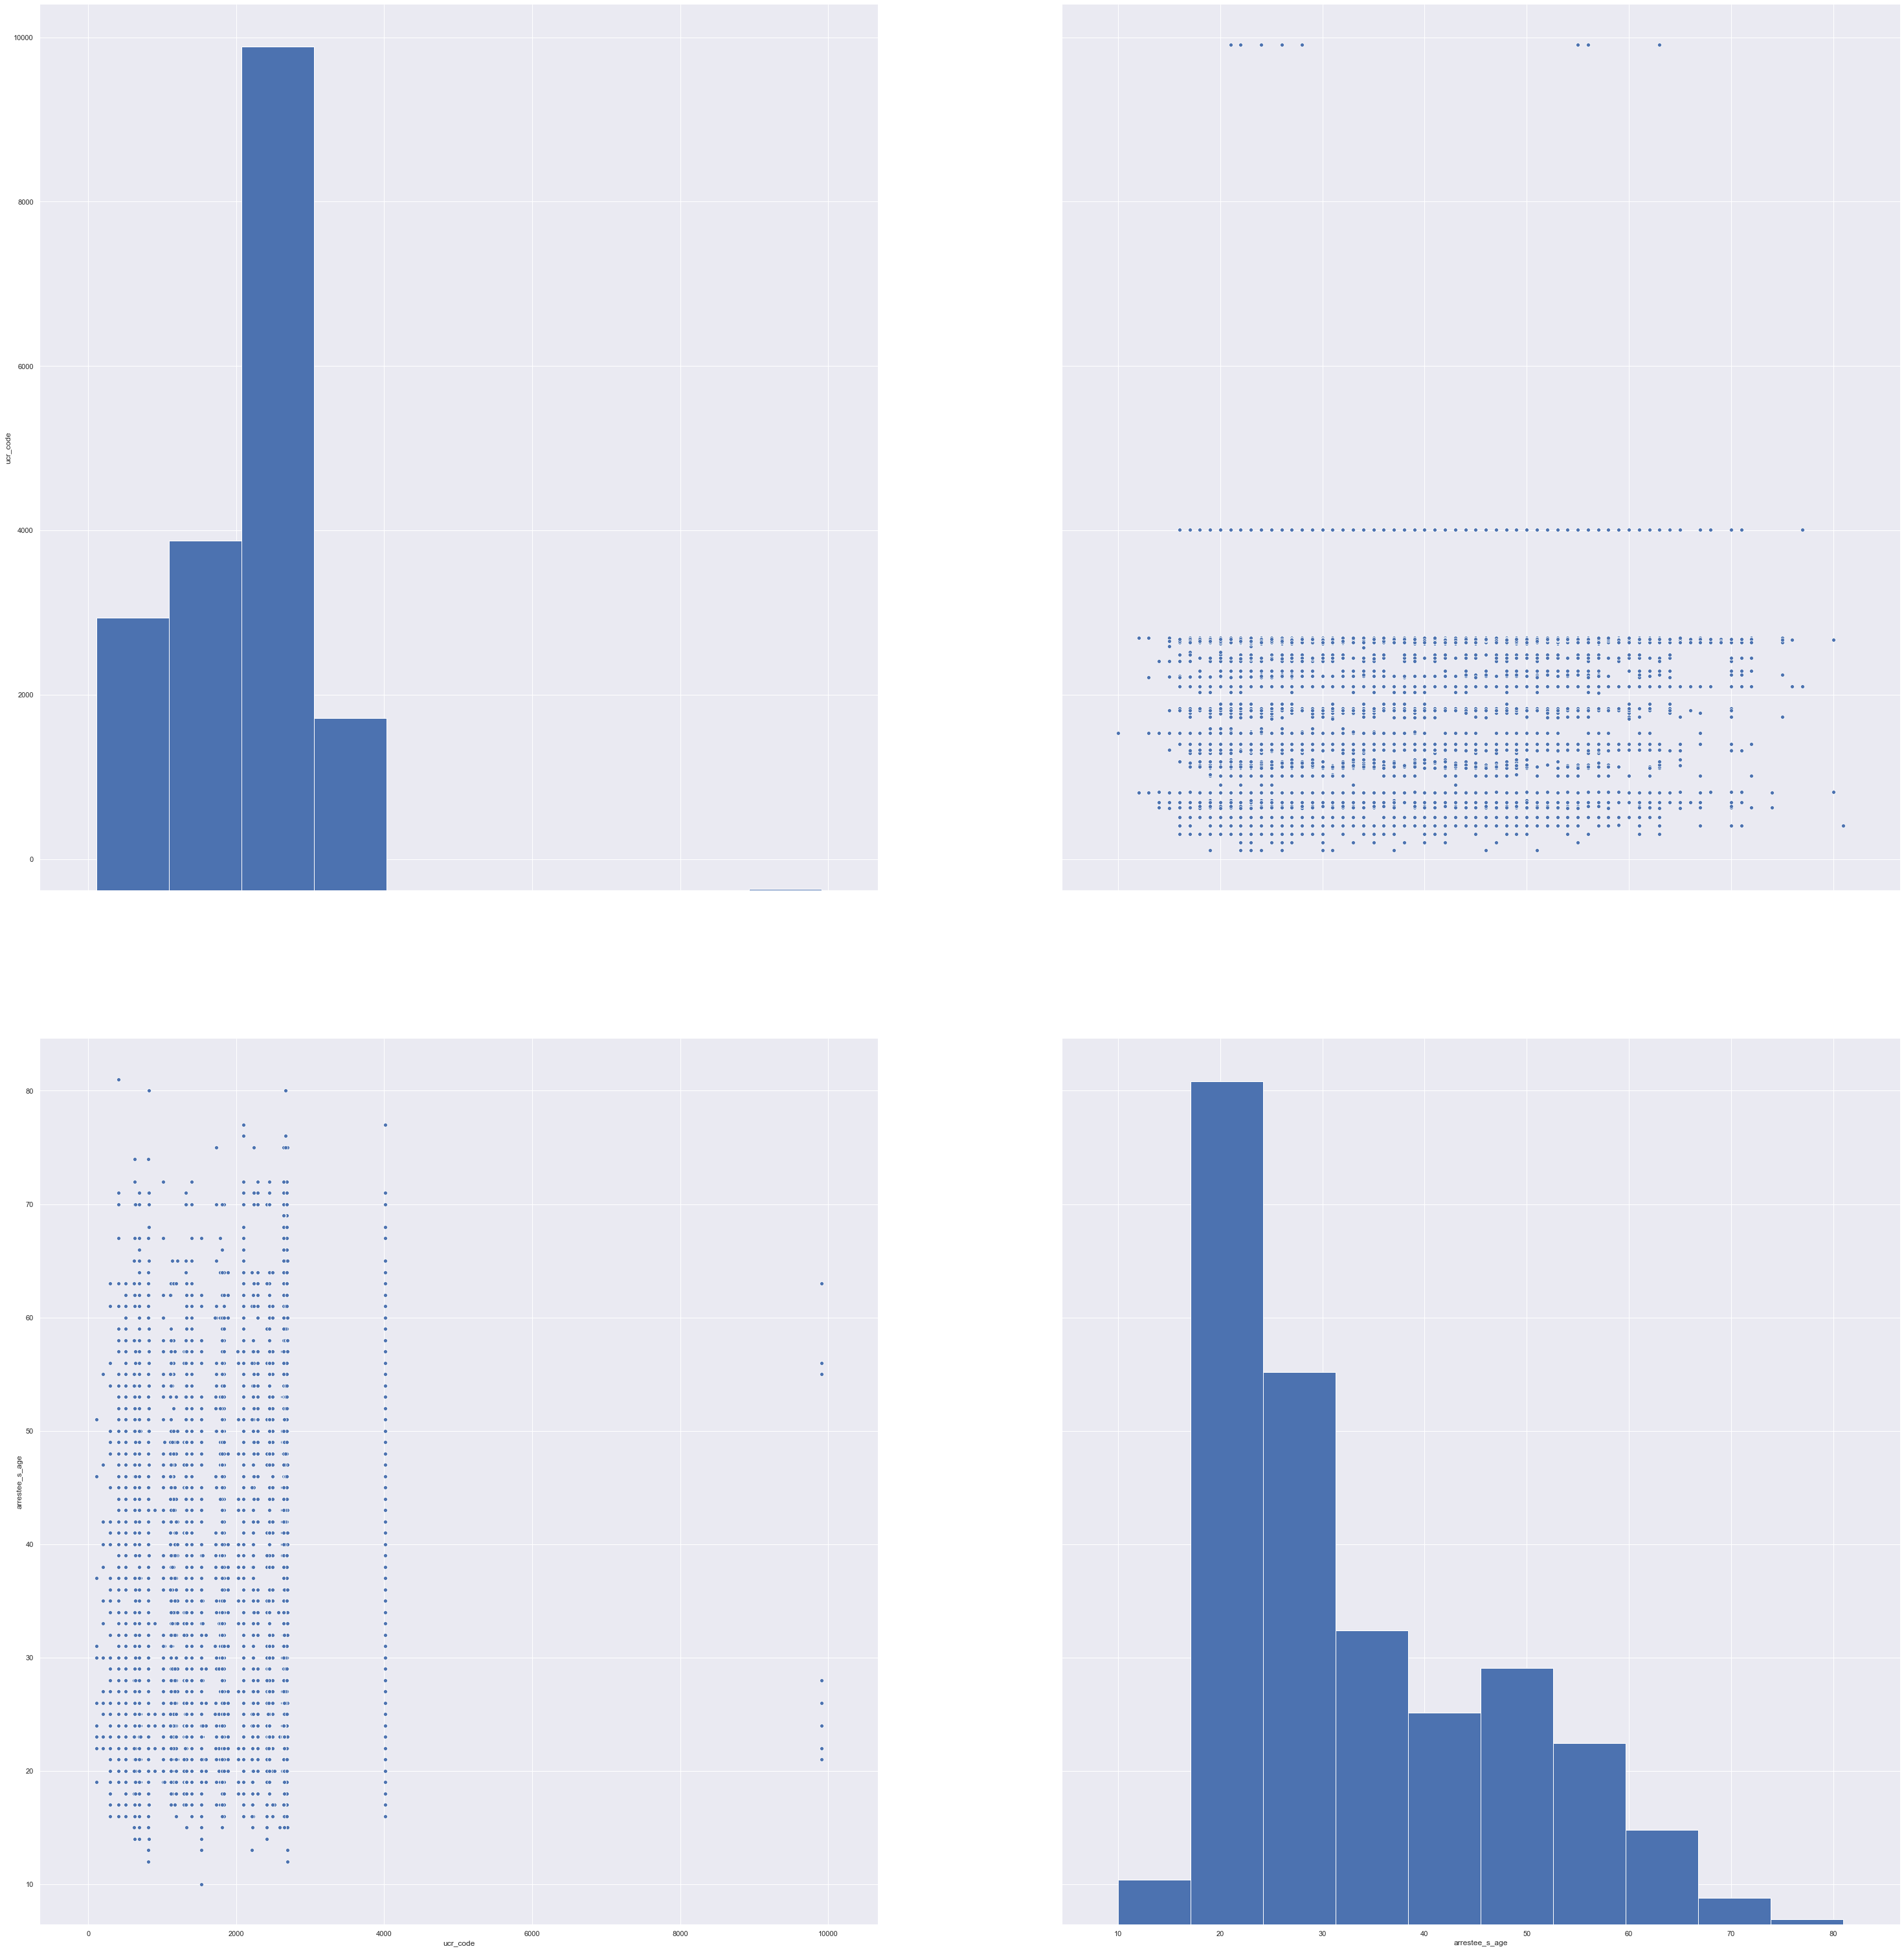

In [11]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(50, 50)  

In [12]:
sn.set(style = 'darkgrid')

pam.shape

(18809, 11)

NameError: name 'ucr_code' is not defined